In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_train=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Extracting features

In [5]:
x_train=df_train[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train = df_train["Survived"]
x_test = df_test[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [6]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [7]:
x1=df_train[df_train["Survived"]==1].drop(columns=["Survived","Name","Cabin"])
x2=df_train[df_train["Survived"]==0].drop(columns=["Survived","Name","Cabin"])

In [76]:
def fun(var):
    fig, (ax1,ax2) =  plt.subplots(nrows=1,ncols=2,figsize = (20,6))
    ax1.bar(list(x1[var].value_counts().keys()),list(x1[var].value_counts()))
    ax1.set_title("survived")
    ax1.set_ylabel("Freuency")
    ax1.set_xlabel(var)
    ax2.bar(list(x2[var].value_counts().keys()),list(x2[var].value_counts()))
    ax2.set_title("Dead")
    ax2.set_ylabel("Frequency")
    ax2.set_xlabel(var)

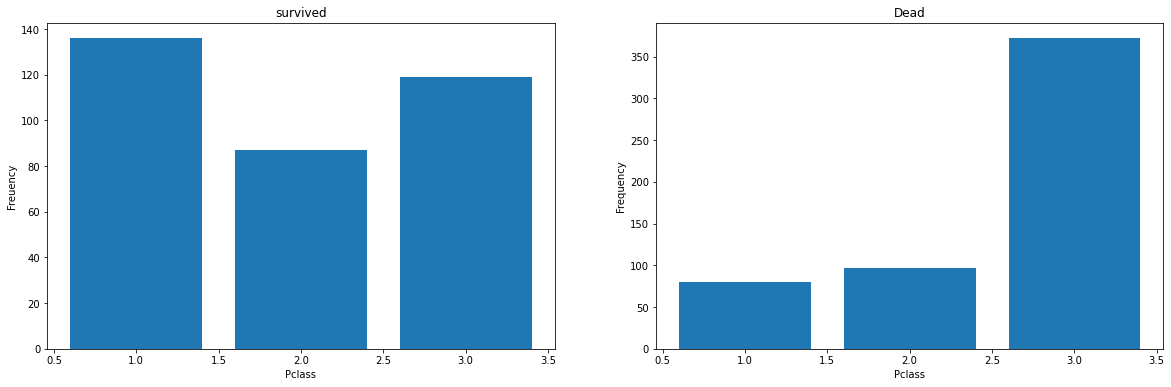

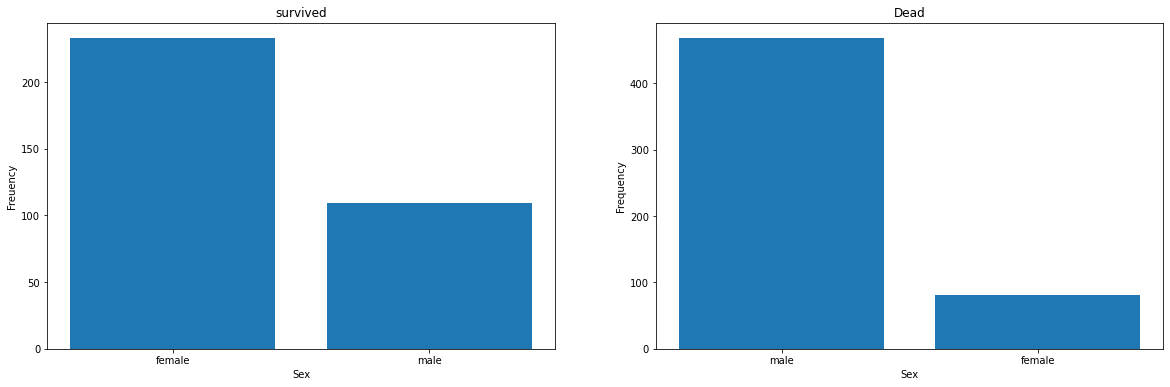

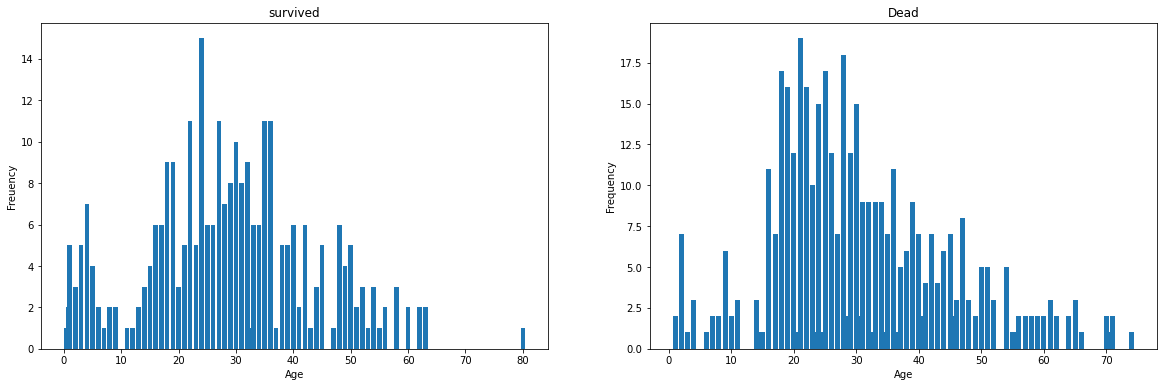

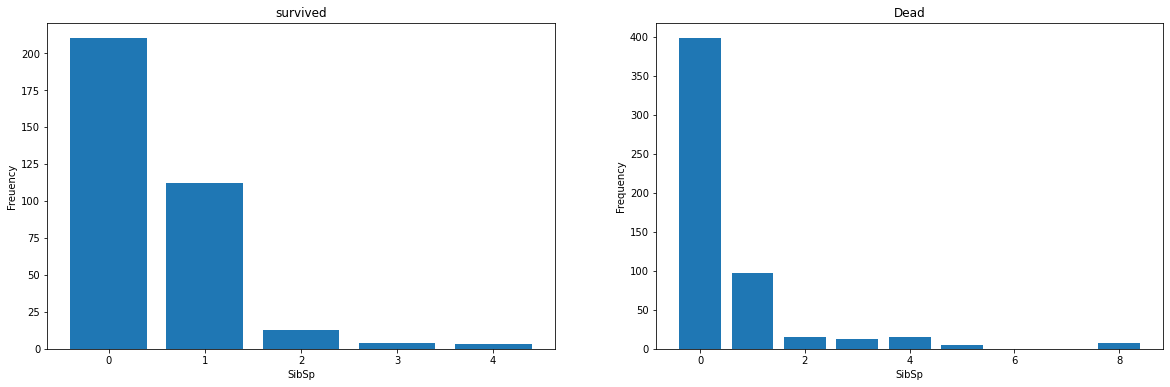

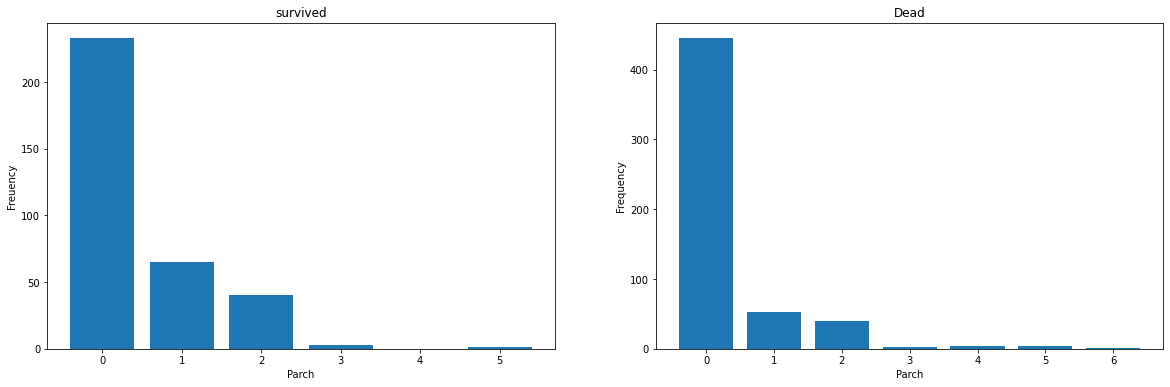

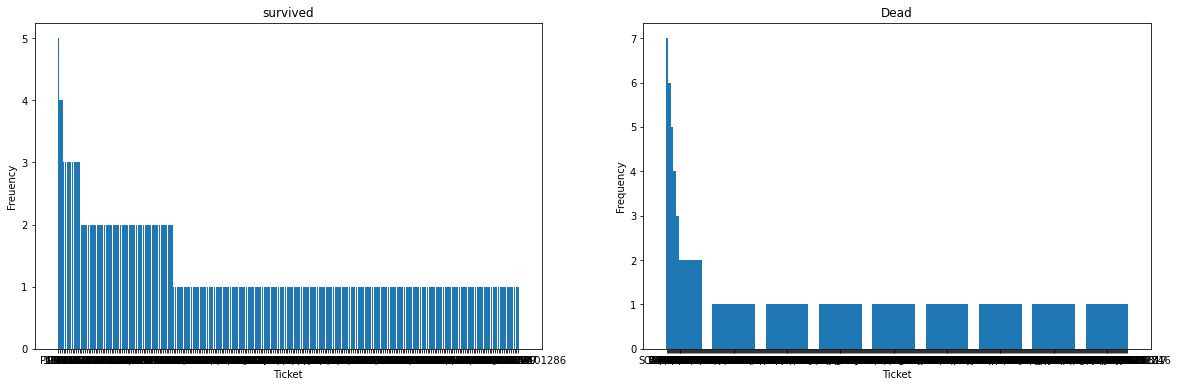

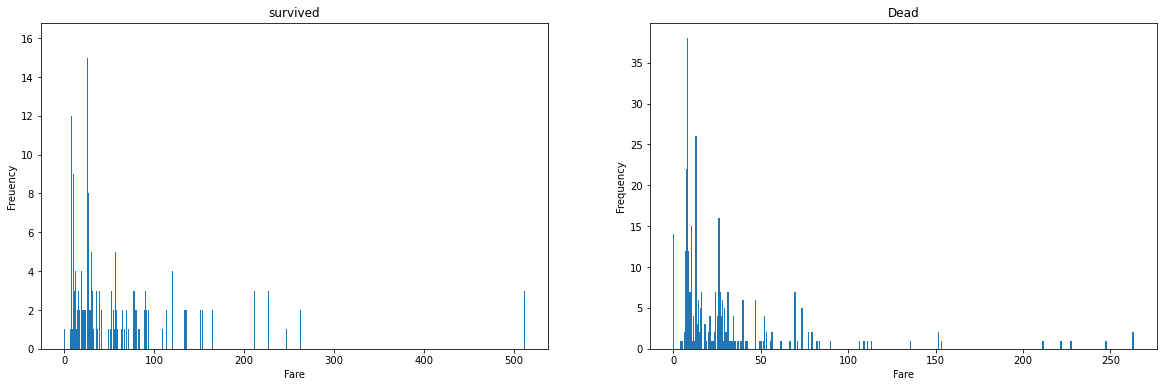

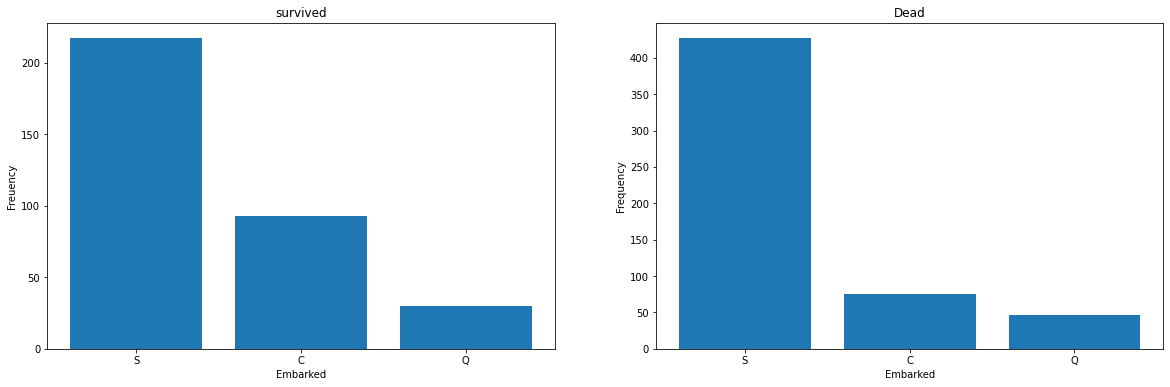

In [77]:
cols = x1.columns
for i in range(1,len(cols)):
    fun(cols[i])

In [8]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch     

In [9]:
x_train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
x_train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [11]:
x_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
x_train["Embarked"].fillna("S",inplace=True)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
x_train["Age"].fillna(x_train["Age"].mean(),inplace=True)
x_test["Age"].fillna(x_train["Age"].mean(),inplace=True)

In [14]:
x_train["Age"].isnull().sum()
x_test["Age"].isnull().sum()

0

In [15]:
x_train["Fare"].fillna(x_train["Fare"].mean(),inplace=True)
x_test["Fare"].fillna(x_train["Fare"].mean(),inplace=True)

In [16]:
x_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
x_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
data = [x_train,x_test]

In [19]:
data

[     PassengerId  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
 0              1       3    male  22.000000      1      0   7.2500        S
 1              2       1  female  38.000000      1      0  71.2833        C
 2              3       3  female  26.000000      0      0   7.9250        S
 3              4       1  female  35.000000      1      0  53.1000        S
 4              5       3    male  35.000000      0      0   8.0500        S
 ..           ...     ...     ...        ...    ...    ...      ...      ...
 886          887       2    male  27.000000      0      0  13.0000        S
 887          888       1  female  19.000000      0      0  30.0000        S
 888          889       3  female  29.699118      1      2  23.4500        S
 889          890       1    male  26.000000      0      0  30.0000        C
 890          891       3    male  32.000000      0      0   7.7500        Q
 
 [891 rows x 8 columns],
      PassengerId  Pclass     Sex        Age  Sib

In [20]:
sex = {'male' : 1 , 'female':0}
embarked  = {'S':0,'C':1,'Q':3}

In [21]:
for dataset in data:
    dataset["Sex"] = dataset["Sex"].replace(sex)

<ipython-input-21-3a58bf99d238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Sex"] = dataset["Sex"].replace(sex)


In [22]:
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].replace(embarked)

<ipython-input-22-d9d81500e3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Embarked"] = dataset["Embarked"].replace(embarked)


In [23]:
data 

[     PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0              1       3    1  22.000000      1      0   7.2500         0
 1              2       1    0  38.000000      1      0  71.2833         1
 2              3       3    0  26.000000      0      0   7.9250         0
 3              4       1    0  35.000000      1      0  53.1000         0
 4              5       3    1  35.000000      0      0   8.0500         0
 ..           ...     ...  ...        ...    ...    ...      ...       ...
 886          887       2    1  27.000000      0      0  13.0000         0
 887          888       1    0  19.000000      0      0  30.0000         0
 888          889       3    0  29.699118      1      2  23.4500         0
 889          890       1    1  26.000000      0      0  30.0000         1
 890          891       3    1  32.000000      0      0   7.7500         3
 
 [891 rows x 8 columns],
      PassengerId  Pclass  Sex        Age  SibSp  Parch      Fare  Embark

In [24]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [25]:
for dataset in data:
    dataset["SibSp"].astype(int)

In [26]:
tempfare = data[0].Fare
tempfare = pd.qcut(tempfare,5)
tempfare.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [27]:
for dataset in data:
    dataset.loc[(dataset["Fare"]<=7.854),"Fare"]=0
    dataset.loc[((dataset["Fare"]>7.854) & (dataset["Fare"]<=10.5)),"Fare"]=1
    dataset.loc[((dataset["Fare"]>10.5) & (dataset["Fare"]<=21.679)),"Fare"]=2
    dataset.loc[((dataset["Fare"]>21.679) & (dataset["Fare"]<=39.688)),"Fare"]=3
    dataset.loc[(dataset["Fare"]>39.688),"Fare"]=4
    dataset.Fare = dataset.Fare.astype(int)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [28]:
data[0].Fare.value_counts()

1    197
3    181
4    176
2    171
0    166
Name: Fare, dtype: int64

In [29]:
tempAge = data[0].Age
tempAge = pd.qcut(tempAge,6)
tempAge.value_counts()

(25.0, 29.699]    260
(0.419, 19.0]     164
(40.5, 80.0]      148
(31.0, 40.5]      138
(19.0, 25.0]      137
(29.699, 31.0]     44
Name: Age, dtype: int64

In [30]:
for dataset in data:
    dataset.loc[(dataset["Age"]<=19.0),"Age"]=0
    dataset.loc[((dataset["Age"]>19.0) & (dataset["Age"]<=25.0)),"Age"]=1
    dataset.loc[((dataset["Age"]>25.0) & (dataset["Age"]<=29.699)),"Age"]=2
    dataset.loc[((dataset["Age"]>29.699) & (dataset["Age"]<=31.0)),"Age"]=3
    dataset.loc[((dataset["Age"]>31.0) & (dataset["Age"]<=40.5)),"Age"]=4
    dataset.loc[(dataset["Age"]>40.5),"Age"]=5
    dataset.Age = dataset.Age.astype(int)

C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [31]:
data[0].Age.value_counts()

3    221
0    164
5    148
4    138
1    137
2     83
Name: Age, dtype: int64

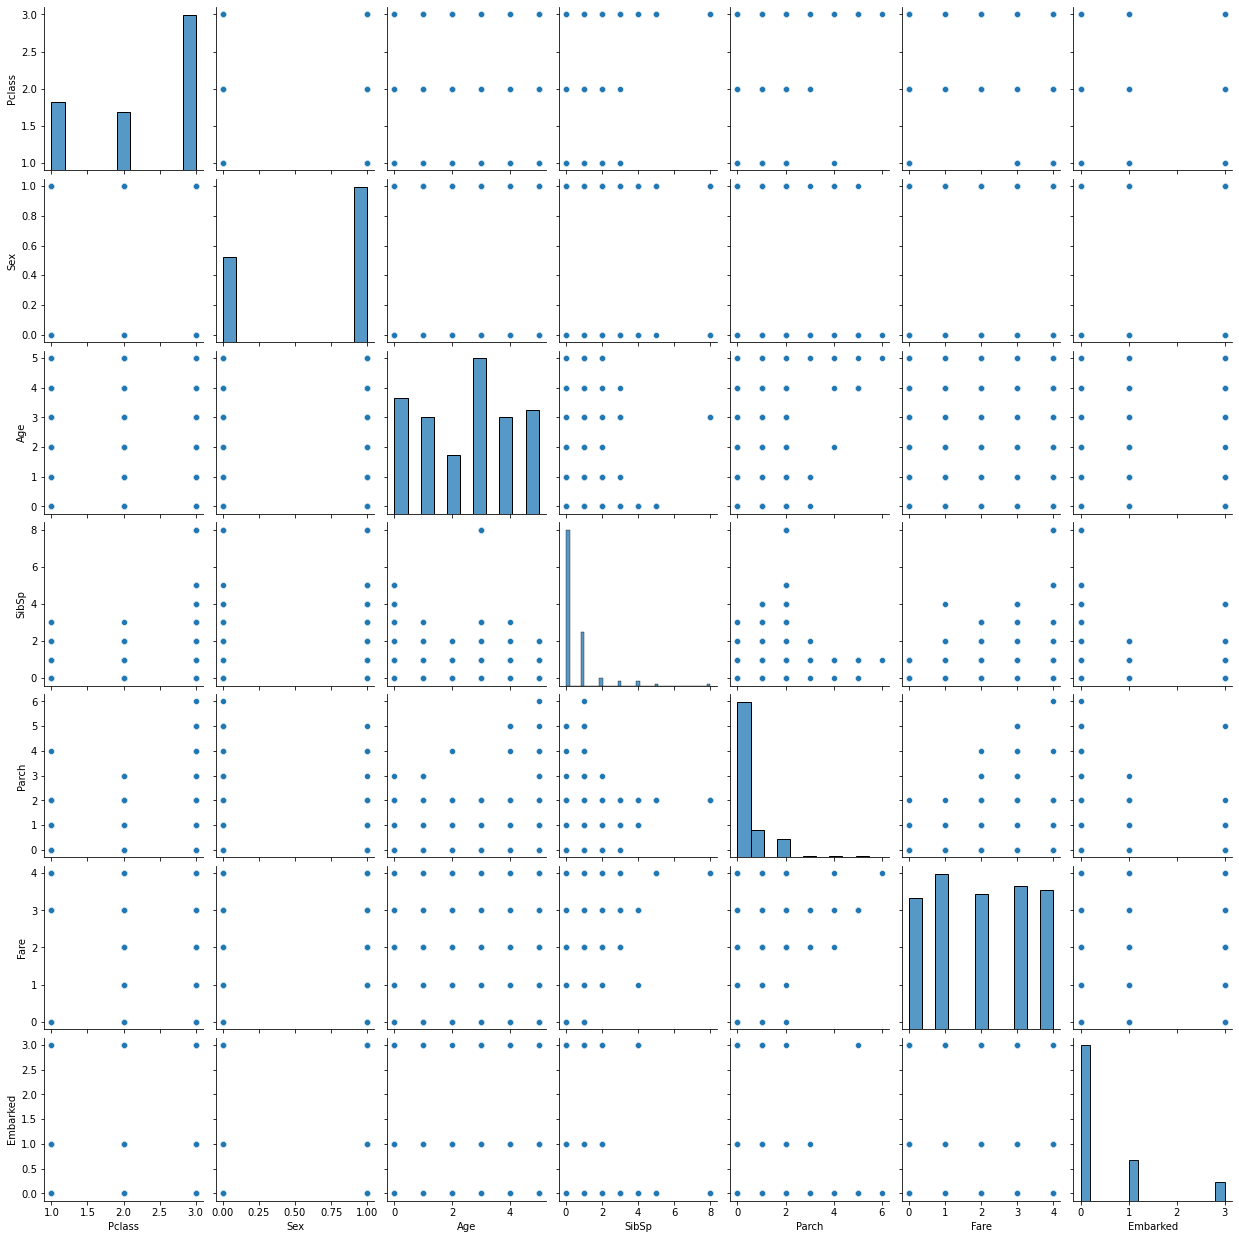

In [34]:
sns.pairplot(data[0].drop("PassengerId",axis=1))

In [35]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int32
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Fare         891 non-null    int32
 7   Embarked     891 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 48.9 KB


In [36]:
data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int32
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int32
 7   Embarked     418 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 23.0 KB


In [37]:
x_train.drop("PassengerId",axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,1,1,0,0,0
1,1,0,4,1,0,4,1
2,3,0,2,0,0,1,0
3,1,0,4,1,0,4,0
4,3,1,4,0,0,1,0
...,...,...,...,...,...,...,...
886,2,1,2,0,0,2,0
887,1,0,0,0,0,3,0
888,3,0,3,1,2,3,0
889,1,1,2,0,0,3,1


In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
predict  = clf.predict(x_test)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
acc = round(clf.score(x_train,y_train)*100,2)
print(acc,"%")

78.11 %
